In [2]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    lambdify,
)
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import *

## tmp_min_sup = infの時

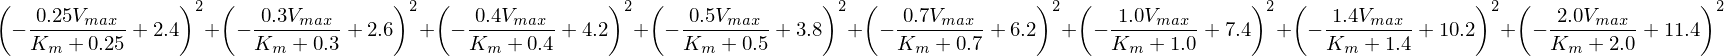

In [3]:
S_v_list = [
    [0.25, 2.4],
    [0.30, 2.6],
    [0.40, 4.2],
    [0.50, 3.8],
    [0.70, 6.2],
    [1.00, 7.4],
    [1.40, 10.2],
    [2.00, 11.4],    
]


K_m, V_max = args = var("K_m V_max ")
f_expr = 0

for S, v in S_v_list:
    f_expr += (v - (1/(K_m + S)) * V_max * S) ** 2
    

f_expr

In [35]:
# X = ip([[interval[0, 10]],[interval[15, 40]]]) # K, S

X = ip([[interval[2.0, 2.8]],[interval[22, 30]]]) # K, S

In [36]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

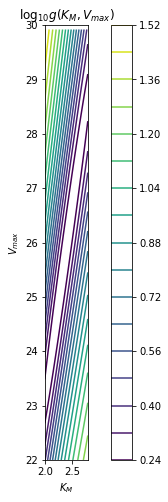

In [37]:
K, V ,Z, K_lim, V_lim = calc_f_meshgrid(f, X)
fig = plt.figure(figsize=(8, 8))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(K_lim)
plt.ylim(V_lim)
plt.xlabel('$K_M$')
plt.ylabel('$V_{max}$')
plt.title('$\log_{10} g(K_M, V_{max})$')
#im = plt.contour(K, V, np.log10(Z), levels=np.arange(0.5, 4, 0.5), shading='gouraud')
im = plt.contour(K, V, np.log10(Z), 20, shading='gouraud')
fig.colorbar(im)
plt.show()


In [38]:
krawczyk = Krawczyk(df, ddf, X)
_1, _2, _3, _4, animation_box = krawczyk.find_global_minimum(f,trace=False, cnt_max=1000, tmp_min_sup=1.7836717549727024)
visualize_optimization_log(krawczyk, f, animation_box, skip=25, zscale='log10')

Loop end. cnt:634, len(S):0, len(T):2, len(U):0

634
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT -----------
[[[interval([2.3263075565533655, 2.326322546126491])],
  [interval([25.39810059185409, 25.398207234969586])]],
 [[interval([2.326313436980207, 2.326316665721217])],
  [interval([25.398142552180097, 25.39816527460562])]]]
Start saveing images in image/20171115_150645 dirctory.
Finish saveing images in image/20171115_150645 dirctory.


In [10]:
print f([[3], [30]])

[[1.7836717549727024]]


In [13]:
z = [[interval([1.5769876313932534, 1.71875])],
  [interval([20.60546875, 20.703125])]]
